In [1]:

# データ処理ラブラり
import numpy as np
import pandas as pd
 
# データ可視化ライブラリ
import matplotlib.pyplot as plt
%matplotlib inline 
 
 #LightGBM
import lightgbm as lgb
 
# Scikit-learn（評価算出）
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

/anaconda3/lib/python3.5/site-packages/lightgbm/__init__.py:45: FutureWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS will be built by the Apple Clang compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you won't need to install the gcc compiler anymore.
Instead of that, you'll need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", FutureWarning)


In [2]:
cd ..

/Users/hasegawatakashikana


In [3]:
cd Downloads/kuzushiji/

/Users/hasegawatakashikana/Downloads/kuzushiji


In [4]:
classes = pd.read_csv('kmnist_classmap.csv')
print(classes.shape)
classes

(10, 3)


,index,codepoint,char
0,0,U+304A,お
1,1,U+304D,き
2,2,U+3059,す
3,3,U+3064,つ
4,4,U+306A,な
5,5,U+306F,は
6,6,U+307E,ま
7,7,U+3084,や
8,8,U+308C,れ
9,9,U+3092,を


In [5]:
# 訓練データの読み込み
X_train = np.load('kmnist-train-imgs.npz')['arr_0']
y_train = np.load('kmnist-train-labels.npz')['arr_0']
 
# テストデータの読み込み
X_test = np.load('kmnist-test-imgs.npz')['arr_0']
y_test = np.load('kmnist-test-labels.npz')['arr_0']

In [6]:
# データのサイズ確認
print(X_train.shape)
print(X_test.shape)
 

(60000, 28, 28)
(10000, 28, 28)


In [7]:
print(y_train[0:5])
print(classes)

[8 7 0 1 4]
   index codepoint char
0      0    U+304A    お
1      1    U+304D    き
2      2    U+3059    す
3      3    U+3064    つ
4      4    U+306A    な
5      5    U+306F    は
6      6    U+307E    ま
7      7    U+3084    や
8      8    U+308C    れ
9      9    U+3092    を


In [8]:
labelindex = classes.set_index('index').to_dict()['char']
labelindex

{0: 'お',
 1: 'き',
 2: 'す',
 3: 'つ',
 4: 'な',
 5: 'は',
 6: 'ま',
 7: 'や',
 8: 'れ',
 9: 'を'}

In [9]:
print(X_train.min())
print(X_train.max())
 

0
255


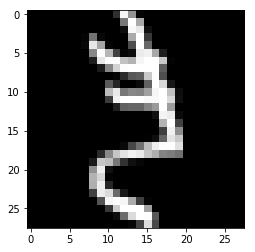

In [10]:
plt.imshow(X_train[423], cmap = plt.cm.gray)
plt.show()


In [11]:
print(y_train[423])
print(labelindex[1])

1
き


In [12]:
X_train[0,10:15,10:15] 

array([[  0,   0, 133,  91,   7],
       [  0,   0, 128, 128,  20],
       [  0,   0,  95, 224,  20],
       [  0,   0, 112, 159,  64],
       [  0,   1, 211, 234, 253]], dtype=uint8)

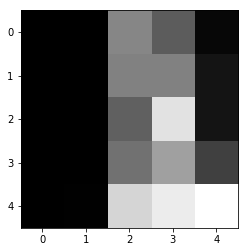

In [13]:
plt.imshow(X_train[0,10:15,10:15], cmap = plt.cm.gray) 

In [14]:
# 訓練/テストデータの正規化
X_train = X_train / 255 
X_test = X_test/ 255

In [15]:
X_train[0,10:15,10:15]
 

array([[0.        , 0.        , 0.52156863, 0.35686275, 0.02745098],
       [0.        , 0.        , 0.50196078, 0.50196078, 0.07843137],
       [0.        , 0.        , 0.37254902, 0.87843137, 0.07843137],
       [0.        , 0.        , 0.43921569, 0.62352941, 0.25098039],
       [0.        , 0.00392157, 0.82745098, 0.91764706, 0.99215686]])

In [16]:
print(X_train.shape)
print(X_test.shape)
 

(60000, 28, 28)
(10000, 28, 28)


In [17]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
 
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [20]:
lgb.LGBMClassifier()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [21]:
# 訓練・テストデータの設定
train_data = lgb.Dataset(X_train, label=y_train)
eval_data = lgb.Dataset(X_test, label=y_test, reference= train_data)

In [22]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 10,
    'verbose': 2,
}

In [23]:
gbm = lgb.train(
    params,
    train_data,
    valid_sets=eval_data,
    num_boost_round=100,
    verbose_eval=5,
)

[5]	valid_0's multi_logloss: 1.71401
[10]	valid_0's multi_logloss: 1.43197
[15]	valid_0's multi_logloss: 1.2474
[20]	valid_0's multi_logloss: 1.11132
[25]	valid_0's multi_logloss: 1.00722
[30]	valid_0's multi_logloss: 0.924201
[35]	valid_0's multi_logloss: 0.856528
[40]	valid_0's multi_logloss: 0.799088
[45]	valid_0's multi_logloss: 0.751136
[50]	valid_0's multi_logloss: 0.711042
[55]	valid_0's multi_logloss: 0.675216
[60]	valid_0's multi_logloss: 0.645093
[65]	valid_0's multi_logloss: 0.617719
[70]	valid_0's multi_logloss: 0.594623
[75]	valid_0's multi_logloss: 0.573648
[80]	valid_0's multi_logloss: 0.5548
[85]	valid_0's multi_logloss: 0.537461
[90]	valid_0's multi_logloss: 0.52171
[95]	valid_0's multi_logloss: 0.508122
[100]	valid_0's multi_logloss: 0.49569


In [24]:
preds = gbm.predict(X_test) 

In [25]:
y_pred = []
 
for x in preds:
    y_pred.append(np.argmax(x))

In [26]:
confusion_matrix(y_test, y_pred)


array([[872,   3,   2,   4,  31,  16,   3,  34,  31,   4],
       [  2, 840,  34,   4,  24,   5,  49,   6,  15,  21],
       [  6,  22, 826,  48,  17,   7,  27,  14,  21,  12],
       [  2,  13,  31, 917,   8,   4,   6,   7,   3,   9],
       [ 35,  22,  24,  13, 834,   8,  23,   9,  18,  14],
       [  7,  25, 101,   7,  16, 802,  26,   2,  12,   2],
       [  2,  18,  52,   4,  19,   5, 885,   9,   3,   3],
       [  9,  21,  12,   5,  73,   2,  34, 787,  37,  20],
       [  5,  34,  10,  32,   2,   7,  21,   1, 883,   5],
       [  5,  21,  30,   7,  34,   3,  12,  26,  25, 837]])

In [27]:
accuracy_score(y_test, y_pred)
 

0.8483

In [33]:
cd house-prices-advanced-regression-techniques/

/Users/hasegawatakashikana/Downloads/house-prices-advanced-regression-techniques


In [34]:
df_train = pd.read_csv('train.csv')

In [35]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive